In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate $x$ and $y$

In [70]:
n=100
x = np.arange(1,n+1,1)
x = x/n  
y = 2.3 + 20*x + 100*x**2 + 100*x**3 +np.random.randn(n)*10

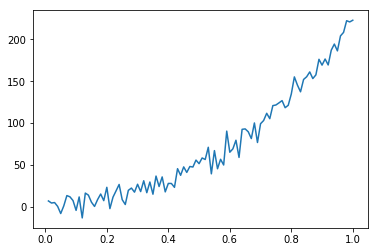

In [71]:
plt.plot(x,y)

# Truncated Vandermonde matrix

In [86]:
A = np.vander(x,increasing=True)[:,:4]

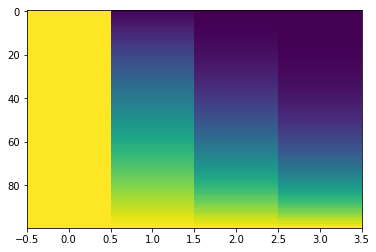

In [87]:
plt.imshow(A,aspect="auto")

### Compute the SVD of $A$

In [88]:
U, s, Vs = np.linalg.svd(A, full_matrices=False)
V = Vs.T
U.shape,s.shape,Vs.shape

((100, 4), (4,), (4, 4))

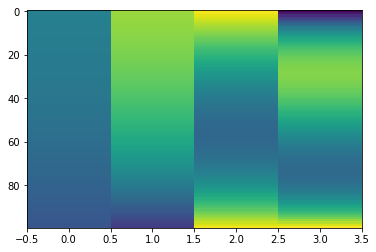

In [89]:
plt.imshow(U,aspect="auto")

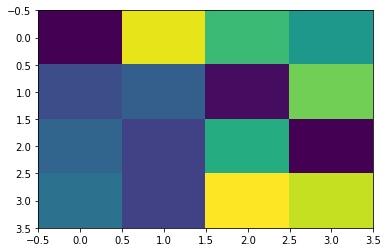

In [90]:
plt.imshow(V,aspect="auto")

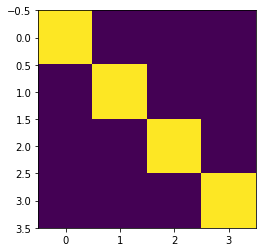

In [91]:
plt.imshow(U.T.dot(U))

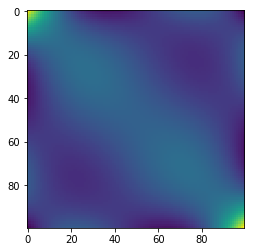

In [92]:
plt.imshow(U.dot(U.T))

### Compute $c$

In [93]:
U_y = U.T.dot(y)
U_y_div_sigma = U_y*1./s
c = V.dot(U_y_div_sigma)

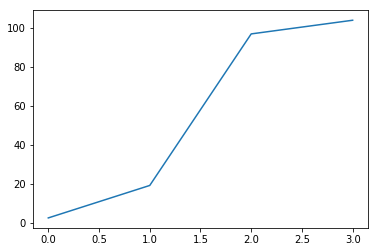

In [94]:
plt.plot(c)

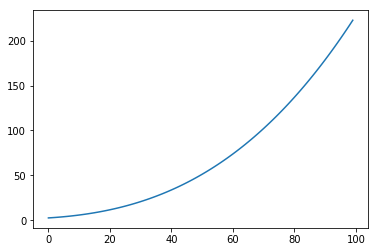

In [95]:
plt.plot(A.dot(c))

# Generate new values, compute $A$ and apply $c$

In [96]:
n=200
x_ = np.arange(1,n+1,1)
x_ = x_/n
x_ = x_[np.logical_and(x_>=x.min(), x_<=x.max())]

In [97]:
A_ = np.vander(x_,increasing=True)
A_ = A_[:,:len(c)]

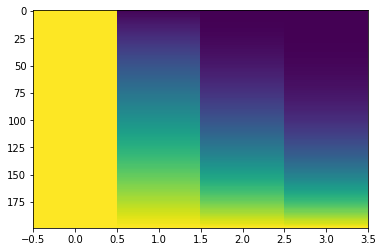

In [98]:
plt.imshow(A_,aspect="auto")

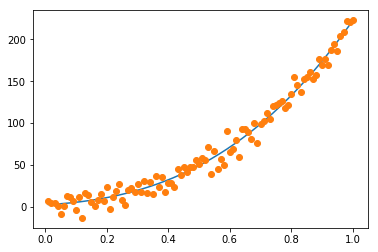

In [99]:
plt.plot(x_,A_.dot(c))
plt.plot(x,y,"o")